In [ ]:
In questa esercitazione abbiamo risolto il problema del commesso viaggiatore utilizzando algoritmi genetici (GA), cercando di minimizzare la lunghezza del percorso
di 34 città disposte su una circonferenza unitaria e all'interno di un quadrato di lato l=2 centrato nell'origine. 
Tramite i GA, è infatti possibile creare nuovi individui, modificarne dei precedenti (mutazioni) e scegliere gli individui genitori che creeranno la nuova prole (crossover). La probabilità di 
chiamare il crossover è stata fissata al 90% e quella delle mutazioni è stata fissata al 20%.
Nei grafici sottostanti è possibile vedere la lunghezza migliore per ogni generazione e il percorso più breve su circonferenza e dentro il quadrato.
Lunghezza percorso più breve su circonferenza = 6.24306 
Lunghezza percorso più breve dentro quadrato = 9.59249


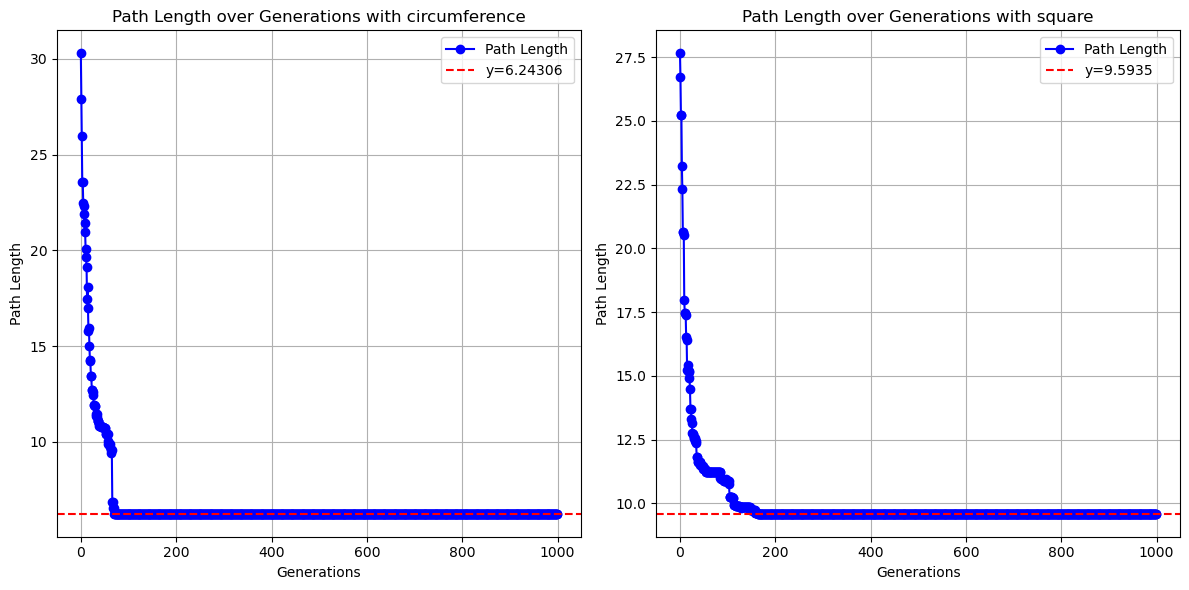

In [14]:
import matplotlib.pyplot as plt

def read_generation_fitness(filename):
    generations = []
    fitness_values = []
    with open(filename, 'r') as file:
        for line in file:
            generation, fitness = map(float, line.split())
            generations.append(generation)
            fitness_values.append(fitness)
    return generations, fitness_values

def plot_generation_fitness(ax, generations, fitness_values, title, hline, hline_label):
    ax.plot(generations, fitness_values, marker='o', linestyle='-', color='b', label='Path Length')
    ax.axhline(y=hline, color='r', linestyle='--', label=hline_label)  # Aggiungi la retta orizzontale
    ax.set_xlabel('Generations')
    ax.set_ylabel('Path Length')
    ax.set_title(title)
    ax.grid(True)
    ax.legend()  # Aggiungi la legenda

if __name__ == "__main__":
    filename1 = 'best_fitness_circle.dat'
    filename2 = 'best_fitness_square.dat'
    
    generations1, fitness_values1 = read_generation_fitness(filename1)
    generations2, fitness_values2 = read_generation_fitness(filename2)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot sul primo asse con retta orizzontale a y=6.24306
    plot_generation_fitness(ax1, generations1, fitness_values1, 'Path Length over Generations with circumference', 6.24306, 'y=6.24306')
    
    # Plot sul secondo asse con retta orizzontale a y=9.5935
    plot_generation_fitness(ax2, generations2, fitness_values2, 'Path Length over Generations with square', 9.5935, 'y=9.5935')
    
    plt.tight_layout()
    plt.show()



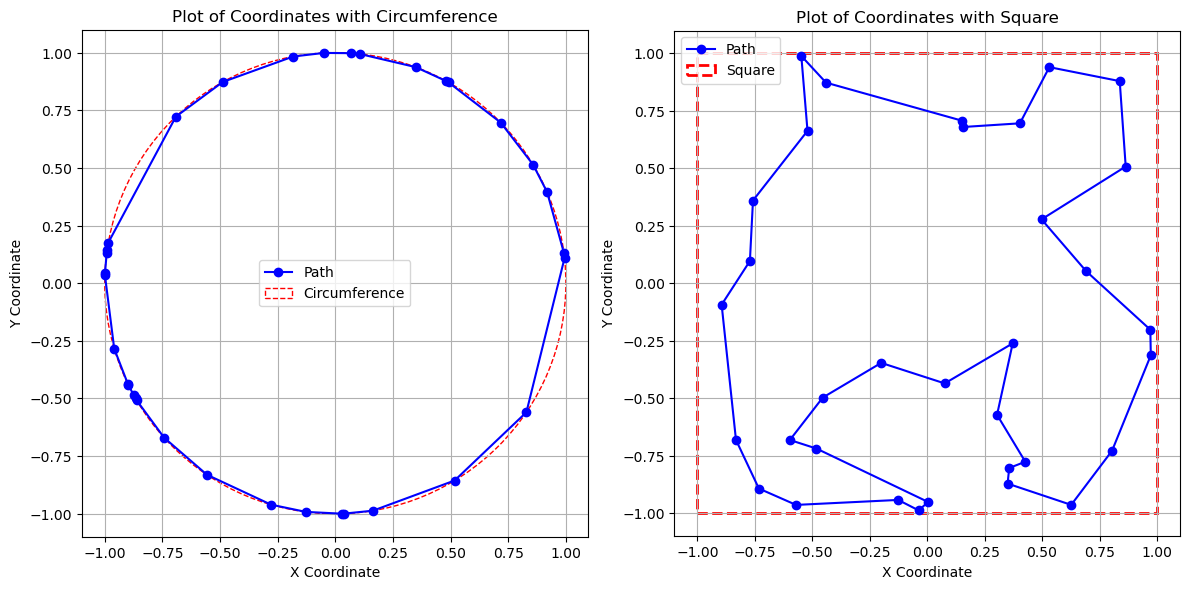

In [3]:
def read_coordinates(filename):
    x_coords = []
    y_coords = []
    with open(filename, 'r') as file:
        for line in file:
            x, y = map(float, line.split())
            x_coords.append(x)
            y_coords.append(y)
    return x_coords, y_coords

def plot_coordinates_with_circle(ax, x_coords, y_coords, radius=1):
    # Plot with lines connecting points
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Path')  
    
    # Connect the last point to the first point
    ax.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], linestyle='-', color='b')  
    
    # Plot the circle
    circle = plt.Circle((0, 0), radius, color='r', fill=False, linestyle='--', label='Circumference')
    ax.add_artist(circle)

    # Set equal scaling to ensure the circle isn't distorted
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Plot of Coordinates with Circumference')
    ax.grid(True)
    ax.legend()

def plot_coordinates_with_square(ax, x_coords, y_coords):
    # Plot with lines connecting points
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Path')  
    
    # Connect the last point to the first point
    ax.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], linestyle='-', color='b')  
    
    # Plot the square
    square = plt.Rectangle((-1, -1), 2, 2, linewidth=2, edgecolor='r', facecolor='none', linestyle='--', label='Square')
    ax.add_patch(square)

    # Set equal scaling to ensure the square isn't distorted
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Plot of Coordinates with Square')
    ax.grid(True)
    ax.legend()

if __name__ == "__main__":
    circle_filename = 'best_individual_circle.dat'
    square_filename = 'best_individual_square.dat'
    
    x_coords_circle, y_coords_circle = read_coordinates(circle_filename)
    x_coords_square, y_coords_square = read_coordinates(square_filename)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    plot_coordinates_with_circle(ax1, x_coords_circle, y_coords_circle)
    plot_coordinates_with_square(ax2, x_coords_square, y_coords_square)
    
    plt.tight_layout()
    plt.show()